## NN-MV-2H
- For this experiment we will use the same data as in the previous experiment, but we will use a neural network with 2 hidden layers.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('fast')

from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten
from sklearn.preprocessing import MinMaxScaler


In [8]:
df = pd.read_csv('time_series.csv',  parse_dates=[0], header=None,index_col=0, names=['date','units'])
df.tail()

,units
date,
2018-11-26,276
2018-11-27,220
2018-11-28,183
2018-11-29,251
2018-11-30,189


In [9]:
df['weekday']=[x.weekday() for x in df.index]
df['month']=[x.month for x in df.index]
df.head()

# Corrige el formato de los datos



,units,weekday,month
date,,,
2017-01-02,236,0,1
2017-01-03,237,1,1
2017-01-04,290,2,1
2017-01-05,221,3,1
2017-01-07,128,5,1


### Data preprocessing

In [10]:
# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [13]:
PASOS=7

# load dataset
values = df['units'].values

# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(-1, 1))
values=values.reshape(-1, 1) # esto lo hacemos porque tenemos 1 sola dimension
scaled = scaler.fit_transform(values)

df['scaled'] = scaled
scaledMerge=df.drop('units',axis=1)
#print(scaledMerge.values)

# frame as supervised learning
reframed = series_to_supervised(scaledMerge, PASOS, 1)
reframed.head()

,var1(t-7),var2(t-7),var3(t-7),var1(t-6),var2(t-6),var3(t-6),var1(t-5),var2(t-5),var3(t-5),var1(t-4),...,var3(t-3),var1(t-2),var2(t-2),var3(t-2),var1(t-1),var2(t-1),var3(t-1),var1(t),var2(t),var3(t)
date,,,,,,,,,,,,,,,,,,,,,
2017-01-11,0.0,1.0,-0.314815,1.0,1.0,-0.311111,2.0,1.0,-0.114815,3.0,...,-0.714815,0.0,1.0,-0.103704,1.0,1.0,-0.225926,2,1,-0.433333
2017-01-12,1.0,1.0,-0.311111,2.0,1.0,-0.114815,3.0,1.0,-0.370370,5.0,...,-0.103704,1.0,1.0,-0.225926,2.0,1.0,-0.433333,3,1,-0.607407
2017-01-13,2.0,1.0,-0.114815,3.0,1.0,-0.370370,5.0,1.0,-0.714815,0.0,...,-0.225926,2.0,1.0,-0.433333,3.0,1.0,-0.607407,4,1,-0.522222
2017-01-14,3.0,1.0,-0.370370,5.0,1.0,-0.714815,0.0,1.0,-0.103704,1.0,...,-0.433333,3.0,1.0,-0.607407,4.0,1.0,-0.522222,5,1,-0.644444
2017-01-16,5.0,1.0,-0.714815,0.0,1.0,-0.103704,1.0,1.0,-0.225926,2.0,...,-0.607407,4.0,1.0,-0.522222,5.0,1.0,-0.644444,0,1,-0.344444


In [14]:
newReframed=reframed.drop(['var1(t)','var2(t)'],axis=1)
print(newReframed.shape)
newReframed.head()

(597, 22)


,var1(t-7),var2(t-7),var3(t-7),var1(t-6),var2(t-6),var3(t-6),var1(t-5),var2(t-5),var3(t-5),var1(t-4),...,var1(t-3),var2(t-3),var3(t-3),var1(t-2),var2(t-2),var3(t-2),var1(t-1),var2(t-1),var3(t-1),var3(t)
date,,,,,,,,,,,,,,,,,,,,,
2017-01-11,0.0,1.0,-0.314815,1.0,1.0,-0.311111,2.0,1.0,-0.114815,3.0,...,5.0,1.0,-0.714815,0.0,1.0,-0.103704,1.0,1.0,-0.225926,-0.433333
2017-01-12,1.0,1.0,-0.311111,2.0,1.0,-0.114815,3.0,1.0,-0.370370,5.0,...,0.0,1.0,-0.103704,1.0,1.0,-0.225926,2.0,1.0,-0.433333,-0.607407
2017-01-13,2.0,1.0,-0.114815,3.0,1.0,-0.370370,5.0,1.0,-0.714815,0.0,...,1.0,1.0,-0.225926,2.0,1.0,-0.433333,3.0,1.0,-0.607407,-0.522222
2017-01-14,3.0,1.0,-0.370370,5.0,1.0,-0.714815,0.0,1.0,-0.103704,1.0,...,2.0,1.0,-0.433333,3.0,1.0,-0.607407,4.0,1.0,-0.522222,-0.644444
2017-01-16,5.0,1.0,-0.714815,0.0,1.0,-0.103704,1.0,1.0,-0.225926,2.0,...,3.0,1.0,-0.607407,4.0,1.0,-0.522222,5.0,1.0,-0.644444,-0.344444


In [15]:
# split into train and test sets
values = newReframed.values
n_train_days = 315+289 - (30+PASOS)
train = values[:n_train_days, :]
test = values[n_train_days:, :]
# split into input and outputs
x_train, y_train = train[:, :-1], train[:, -1]
x_val, y_val = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
x_train = x_train.reshape((x_train.shape[0], 1, x_train.shape[1]))
x_val = x_val.reshape((x_val.shape[0], 1, x_val.shape[1]))
print(x_train.shape, y_train.shape, x_val.shape, y_val.shape)

(567, 1, 21) (567,) (30, 1, 21) (30,)


### Now I will create the neural network model
- I will use a Feed Forward Neural Network with 2 hidden layers.
- There are 21 columns in the input data, 7 for each of the 3 variables.

In [16]:
def crear_modeloFF():
    model = Sequential() 
    model.add(Dense(PASOS, input_shape=(1,PASOS*3),activation='tanh'))
    model.add(Flatten())
    model.add(Dense(1, activation='tanh'))
    model.compile(loss='mean_absolute_error',optimizer='Adam',metrics=["mse"])
    model.summary()
    return model

In [17]:
# Tarining
EPOCHS=40

model = crear_modeloFF()

history=model.fit(x_train,y_train,epochs=EPOCHS,validation_data=(x_val,y_val),batch_size=PASOS)



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1, 7)              154       
                                                                 
 flatten (Flatten)           (None, 7)                 0         
                                                                 
 dense_1 (Dense)             (None, 1)                 8         
                                                                 
Total params: 162 (648.00 Byte)
Trainable params: 162 (648.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/40


81/81 [==============================] - 3s 9ms/step - loss: 0.5220 - mse: 0.4594 - val_loss: 0.1720 - val_mse: 0.0496
Epoch 2/40
81/81 [==============================] - 0s 6ms/step - loss: 0.3449 - mse: 0.2330 - val_loss: 0.1597 - val_mse: 0.0455
Epoch 3/40
81/81 [

1/1 [==============================] - 0s 262ms/step
30


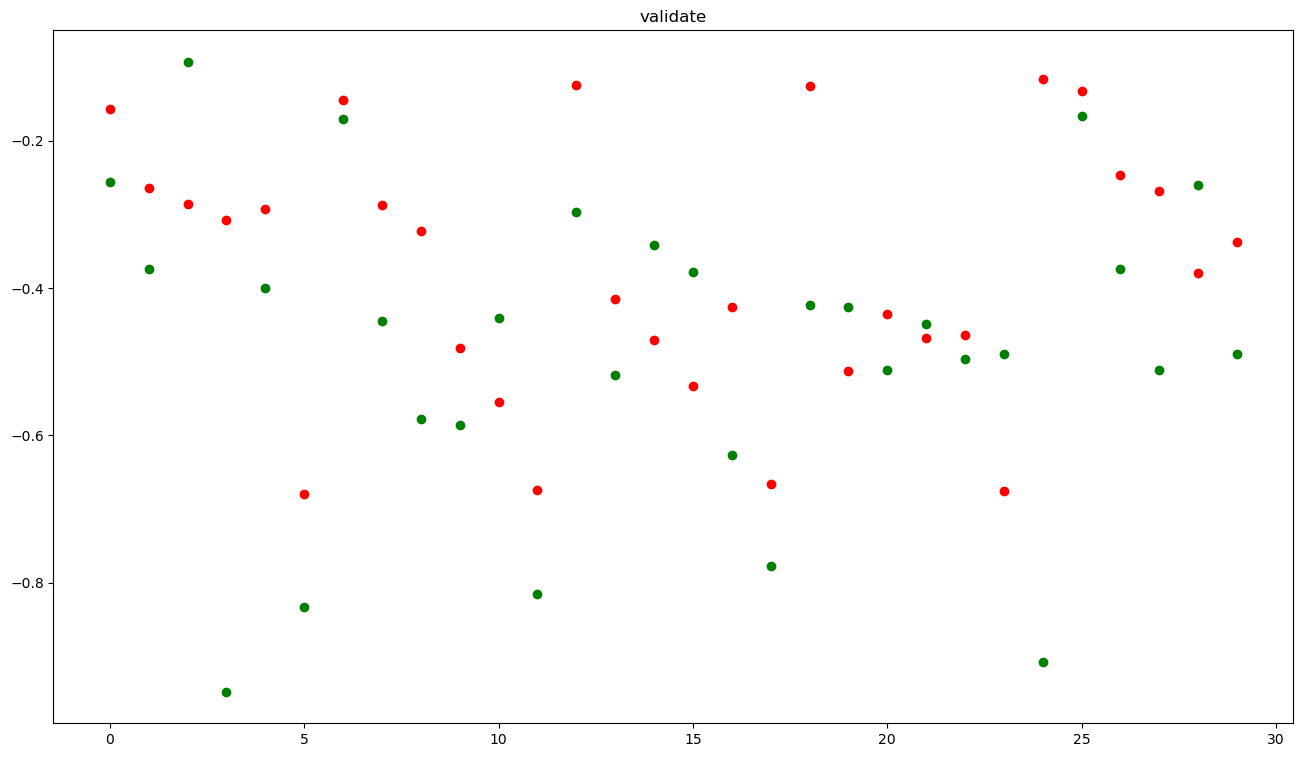

In [18]:
# Visualize training history
results=model.predict(x_val)
print( len(results) )
plt.scatter(range(len(y_val)),y_val,c='g')
plt.scatter(range(len(results)),results,c='r')
plt.title('validate')
plt.show()

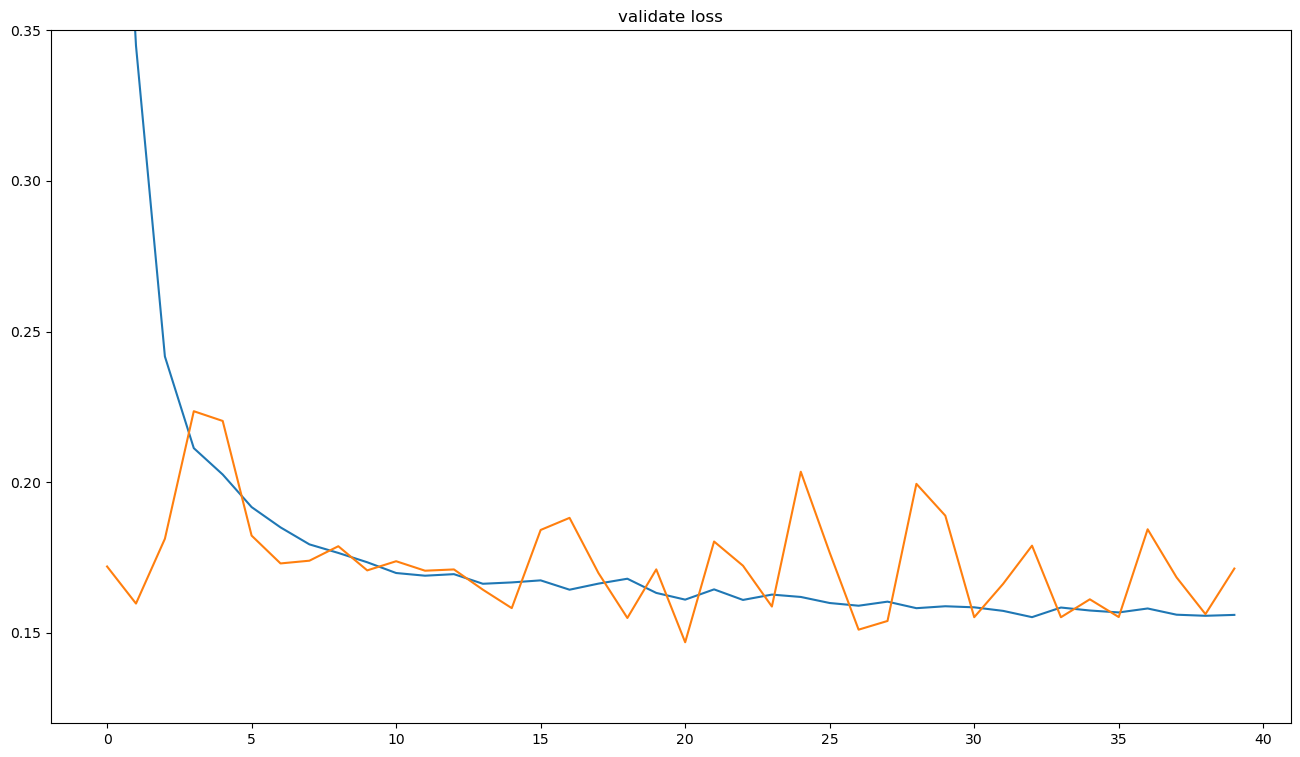

In [19]:
# Plot training & validation loss values
plt.ylim(0.12, 0.35)
plt.plot(history.history['loss'])
plt.title('loss')
plt.plot(history.history['val_loss'])
plt.title('validate loss')
plt.show()

In [20]:
versus = pd.DataFrame(np.array([y_val, [x[0] for x in results]])).transpose()
versus.columns = ['Actual', 'prediction']

inverted = scaler.inverse_transform(versus.values)

versus2 = pd.DataFrame(inverted)
versus2.columns = ['Actual', 'prediction']
versus2['Diference'] = versus2['Actual'] - versus2['prediction']
versus2.head(10)


,Actual,prediction,Diference
0,252.000006,278.860532,-26.860527
1,220.000002,249.589864,-29.589862
2,296.000009,243.777865,52.222144
3,64.999995,237.992598,-172.992603
4,212.999999,242.099556,-29.099557
5,95.999996,137.545360,-41.545364
6,274.999986,282.116612,-7.116626
7,201.000000,243.619862,-42.619862
8,165.000001,233.825998,-68.825997
9,162.999996,191.079522,-28.079526


In [21]:
versus2.describe()


,Actual,prediction,Diference
count,30.000000,30.000000,30.000000
mean,191.633332,219.822340,-28.189008
std,57.580817,47.613531,57.684255
min,64.999995,137.545360,-213.635679
25%,169.000000,191.802514,-42.351238
50%,200.499998,224.371670,-28.589542
75%,220.000002,249.310994,2.226984
max,296.000009,289.635686,52.222144


<Axes: >

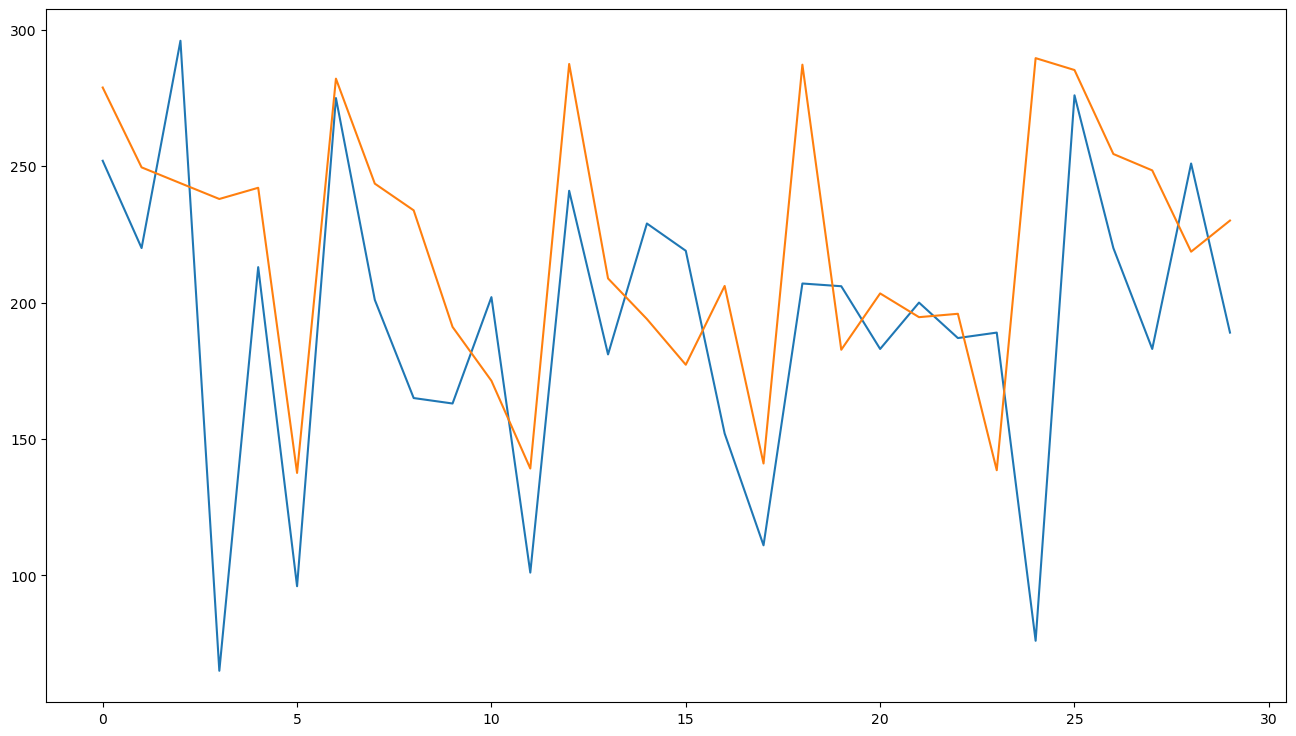

In [24]:
versus2['Actual'].plot()
versus2['prediction'].plot()

## Forecast

In [25]:
last_days = df['2018-11-16':'2018-11-30']
last_days

,units,weekday,month,scaled
date,,,,
2018-11-16,152,4,11,-0.625926
2018-11-17,111,5,11,-0.777778
2018-11-19,207,0,11,-0.422222
2018-11-20,206,1,11,-0.425926
2018-11-21,183,2,11,-0.511111
2018-11-22,200,3,11,-0.448148
2018-11-23,187,4,11,-0.496296
2018-11-24,189,5,11,-0.488889
2018-11-25,76,6,11,-0.907407


In [27]:
# Test data
scaledMerge=last_days.drop('units',axis=1)
print(scaledMerge.values)

# frame as supervised learning
reframed = series_to_supervised(scaledMerge, PASOS, 1)
newReframed=reframed.drop(['var1(t)','var2(t)','var3(t)'],axis=1)
newReframed.head(7)

[[ 4.         11.         -0.62592596]
 [ 5.         11.         -0.77777779]
 [ 0.         11.         -0.42222226]
 [ 1.         11.         -0.42592597]
 [ 2.         11.         -0.51111114]
 [ 3.         11.         -0.44814819]
 [ 4.         11.         -0.49629635]
 [ 5.         11.         -0.48888892]
 [ 6.         11.         -0.9074074 ]
 [ 0.         11.         -0.16666675]
 [ 1.         11.         -0.3740741 ]
 [ 2.         11.         -0.51111114]
 [ 3.         11.         -0.25925928]
 [ 4.         11.         -0.48888892]]


,var1(t-7),var2(t-7),var3(t-7),var1(t-6),var2(t-6),var3(t-6),var1(t-5),var2(t-5),var3(t-5),var1(t-4),...,var3(t-4),var1(t-3),var2(t-3),var3(t-3),var1(t-2),var2(t-2),var3(t-2),var1(t-1),var2(t-1),var3(t-1)
date,,,,,,,,,,,,,,,,,,,,,
2018-11-24,4.0,11.0,-0.625926,5.0,11.0,-0.777778,0.0,11.0,-0.422222,1.0,...,-0.425926,2.0,11.0,-0.511111,3.0,11.0,-0.448148,4.0,11.0,-0.496296
2018-11-25,5.0,11.0,-0.777778,0.0,11.0,-0.422222,1.0,11.0,-0.425926,2.0,...,-0.511111,3.0,11.0,-0.448148,4.0,11.0,-0.496296,5.0,11.0,-0.488889
2018-11-26,0.0,11.0,-0.422222,1.0,11.0,-0.425926,2.0,11.0,-0.511111,3.0,...,-0.448148,4.0,11.0,-0.496296,5.0,11.0,-0.488889,6.0,11.0,-0.907407
2018-11-27,1.0,11.0,-0.425926,2.0,11.0,-0.511111,3.0,11.0,-0.448148,4.0,...,-0.496296,5.0,11.0,-0.488889,6.0,11.0,-0.907407,0.0,11.0,-0.166667
2018-11-28,2.0,11.0,-0.511111,3.0,11.0,-0.448148,4.0,11.0,-0.496296,5.0,...,-0.488889,6.0,11.0,-0.907407,0.0,11.0,-0.166667,1.0,11.0,-0.374074
2018-11-29,3.0,11.0,-0.448148,4.0,11.0,-0.496296,5.0,11.0,-0.488889,6.0,...,-0.907407,0.0,11.0,-0.166667,1.0,11.0,-0.374074,2.0,11.0,-0.511111
2018-11-30,4.0,11.0,-0.496296,5.0,11.0,-0.488889,6.0,11.0,-0.907407,0.0,...,-0.166667,1.0,11.0,-0.374074,2.0,11.0,-0.511111,3.0,11.0,-0.259259


In [31]:
values = newReframed.values
x_test = values[6:, :]
x_test = x_test.reshape((x_test.shape[0], 1, x_test.shape[1]))
print(x_test.shape)
print(x_test)
lastWeekDay = newReframed.index[len(newReframed.index)-1].weekday()

(1, 1, 21)
[[[ 4.         11.         -0.49629635  5.         11.
   -0.48888892  6.         11.         -0.9074074   0.
   11.         -0.16666675  1.         11.         -0.3740741
    2.         11.         -0.51111114  3.         11.
   -0.25925928]]]


In [32]:
def addNewValue(x_test,newValue,lastWeekDay):
    for i in range(x_test.shape[2]-3):
        x_test[0][0][i] = x_test[0][0][i+3]
    lastWeekDay=lastWeekDay+1
    if lastWeekDay>6:
        lastWeekDay=0
    x_test[0][0][x_test.shape[2]-3]=lastWeekDay
    x_test[0][0][x_test.shape[2]-2]=12
    x_test[0][0][x_test.shape[2]-1]=newValue
    return x_test,lastWeekDay

In [36]:
results=[]
for i in range(7):
    parcial=model.predict(x_test)
    results.append(parcial[0])
    print('pred',i,x_test)
    x_test,lastWeekDay=addNewValue(x_test,parcial[0],lastWeekDay)

1/1 [==============================] - 0s 196ms/step
pred 0 [[[ 4.         11.         -0.49629635  5.         11.
   -0.48888892  6.         11.         -0.9074074   0.
   11.         -0.16666675  1.         11.         -0.3740741
    2.         11.         -0.51111114  3.         11.
   -0.25925928]]]
1/1 [==============================] - 0s 45ms/step
pred 1 [[[ 5.         11.         -0.48888892  6.         11.
   -0.9074074   0.         11.         -0.16666675  1.
   11.         -0.3740741   2.         11.         -0.51111114
    3.         11.         -0.25925928  5.         12.
   -0.33674031]]]


C:\Users\quint.LAPTOP-LGVR2QRN\AppData\Local\Temp\ipykernel_19480\2675716821.py:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x_test[0][0][x_test.shape[2]-1]=newValue


1/1 [==============================] - 0s 90ms/step
pred 2 [[[ 6.         11.         -0.9074074   0.         11.
   -0.16666675  1.         11.         -0.3740741   2.
   11.         -0.51111114  3.         11.         -0.25925928
    5.         12.         -0.33674031  6.         12.
   -0.56121743]]]
1/1 [==============================] - 0s 48ms/step
pred 3 [[[ 0.         11.         -0.16666675  1.         11.
   -0.3740741   2.         11.         -0.51111114  3.
   11.         -0.25925928  5.         12.         -0.33674031
    6.         12.         -0.56121743  0.         12.
   -0.07301302]]]
1/1 [==============================] - 0s 39ms/step
pred 4 [[[ 1.         11.         -0.3740741   2.         11.
   -0.51111114  3.         11.         -0.25925928  5.
   12.         -0.33674031  6.         12.         -0.56121743
    0.         12.         -0.07301302  1.         12.
   -0.2412909 ]]]
1/1 [==============================] - 0s 55ms/step
pred 5 [[[ 2.         11.        

In [37]:
# Undo normalization
adimen = [x for x in results]    
print(adimen)
inverted = scaler.inverse_transform(adimen)
inverted

[array([-0.33674031], dtype=float32), array([-0.5612174], dtype=float32), array([-0.07301302], dtype=float32), array([-0.2412909], dtype=float32), array([-0.1632242], dtype=float32), array([-0.24235009], dtype=float32), array([-0.21085198], dtype=float32)]


array([[230.08012404],
       [169.47130265],
       [301.28649626],
       [255.85146731],
       [276.92947446],
       [255.56548616],
       [264.06997448]])

## Visualization of the prediction

c:\Users\quint.LAPTOP-LGVR2QRN\.conda\envs\VSCode\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\quint.LAPTOP-LGVR2QRN\.conda\envs\VSCode\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\quint.LAPTOP-LGVR2QRN\.conda\envs\VSCode\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\quint.LAPTOP-LGVR2QRN\.conda\envs\VSCode\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be r

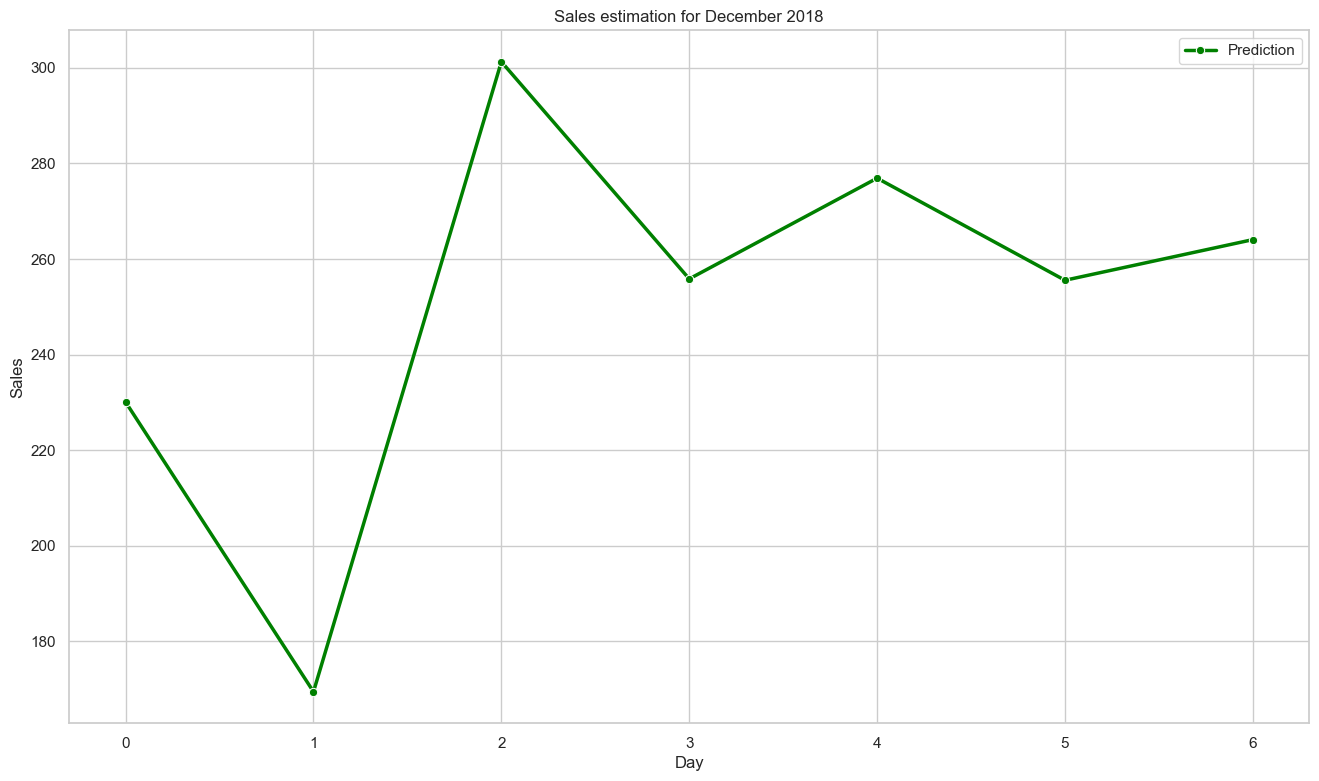

In [56]:
import seaborn as sns

DecemberPredict = pd.DataFrame(inverted)

sns.set(rc={'figure.figsize':(16, 9)})
sns.set(style="whitegrid")

ax = sns.lineplot(data=DecemberPredict,markers=True,dashes=False,palette='tab10',linewidth=2.5)
ax.lines[0].set_color("green")
ax.legend(['Prediction'])
ax.set_title('Sales estimation for December 2018')
ax.set(xlabel='Day', ylabel='Sales')

plt.show()


In [63]:
DecemberPredict.columns = ['units']
DecemberPredict



,units
0,230.080124
1,169.471303
2,301.286496
3,255.851467
4,276.929474
5,255.565486
6,264.069974
